# EEFxTMS_2F (Equatorial electric field)

> Abstract: Access to the equatorial electric field (level 2 product).

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

viresclient: 0.14.1
pandas     : 2.1.3
xarray     : 2023.12.0
matplotlib : 3.8.2



In [2]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

request = SwarmRequest()

## EEFxTMS_2F product information

Dayside equatorial electric field, sampled at every dayside equator crossing +- 20mins


Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-2-product-definitions#EEFxTMS_2F

### Check what "EEF" data variables are available

In [3]:
request.available_collections("EEF", details=False)

{'EEF': ['SW_OPER_EEFATMS_2F', 'SW_OPER_EEFBTMS_2F', 'SW_OPER_EEFCTMS_2F']}

In [4]:
request.available_measurements("EEF")

['EEF', 'EEJ', 'RelErr', 'Flags']

## Fetch all the EEF and EEJ values from Bravo during 2016

In [5]:
request.set_collection("SW_OPER_EEFBTMS_2F")
request.set_products(measurements=["EEF", "EEJ", "Flags"])
data = request.get_between(
    dt.datetime(2016,1,1),
    dt.datetime(2017,1,1)
)

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (7.467MB)

In [6]:
# The first three and last three source (daily) files
data.sources[:3], data.sources[-3:]

(['SW_OPER_EEFBTMS_2F_20160101T000000_20160101T235959_0501',
  'SW_OPER_EEFBTMS_2F_20160102T000000_20160102T235959_0501',
  'SW_OPER_EEFBTMS_2F_20160103T000000_20160103T235959_0501'],
 ['SW_OPER_EEFBTMS_2F_20161229T000000_20161229T235959_0501',
  'SW_OPER_EEFBTMS_2F_20161230T000000_20161230T235959_0501',
  'SW_OPER_EEFBTMS_2F_20161231T000000_20161231T235959_0501'])

In [7]:
df = data.as_dataframe()
df.head()

EEF   Latitude  \
Timestamp                                            
2016-01-01 00:05:42.636437504 -0.829534  -4.859140   
2016-01-01 00:52:24.213226496 -0.781043   7.236889   
2016-01-01 01:38:42.575929600 -2.571197 -11.654174   
2016-01-01 02:27:07.161820416 -0.434457   7.519415   
2016-01-01 03:14:22.379351552 -1.864807  -8.346228   

                                                                             EEJ  \
Timestamp                                                                          
2016-01-01 00:05:42.636437504  [24.298409660724694, 25.21776167830186, 20.418...   
2016-01-01 00:52:24.213226496  [45.424242213581074, 44.42757660120377, 34.358...   
2016-01-01 01:38:42.575929600  [17.501920350641985, 15.9999760662759, 9.54703...   
2016-01-01 02:27:07.161820416  [47.737232450260244, 43.650295454193774, 28.56...   
2016-01-01 03:14:22.379351552  [44.44319343970153, 44.357071234833676, 32.170...   

                                Longitude Spacecraft  Flags  
Timestamp                                                    
2016-01-01 00:05:42.636437504  -54.437434          B      0  
2016-01-01 00:52:24.213226496  113.752507          B      0  
2016-01-01 01:38:42.575929600  -78.042841          B      0  
2016-01-01 02:27:07.161820416   89.978253          B      0  
2016-01-01 03:14:22.379351552 -101.909106          B      0

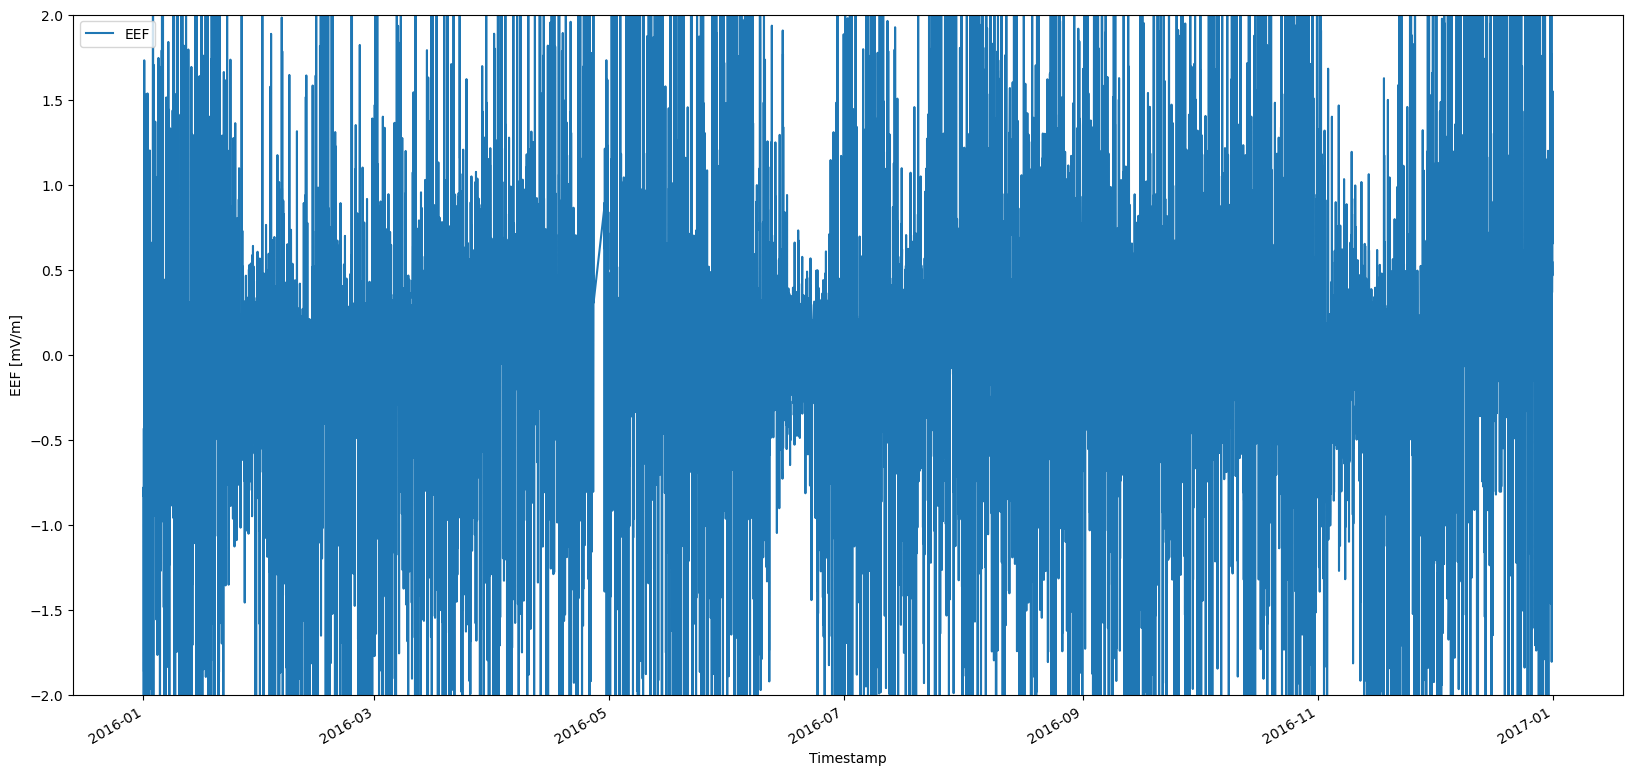

In [8]:
ax = df.plot(y="EEF", figsize=(20,10))
ax.set_ylim((-2, 2));
ax.set_ylabel("EEF [mV/m]");

Take a look at the time jumps between entries... Nominally the product should produce one measurement "every dayside equator crossing ±20 minutes"

In [9]:
times = df.index
delta_t_minutes = [t.seconds/60 for t in np.diff(times.to_pydatetime())]
print("Range of time gaps (in minutes) between successive measurements:")
np.unique(np.sort(delta_t_minutes))

Range of time gaps (in minutes) between successive measurements:


array([  42.63333333,   42.65      ,   42.66666667,   42.68333333,
         42.7       ,   42.71666667,   42.73333333,   42.75      ,
         42.76666667,   42.78333333,   42.8       ,   42.81666667,
         42.83333333,   42.85      ,   42.86666667,   42.88333333,
         42.9       ,   42.91666667,   42.93333333,   42.95      ,
         42.96666667,   42.98333333,   43.        ,   43.01666667,
         43.03333333,   43.05      ,   43.06666667,   43.08333333,
         43.1       ,   43.11666667,   43.13333333,   43.15      ,
         43.16666667,   43.18333333,   43.2       ,   43.21666667,
         43.23333333,   43.25      ,   43.26666667,   43.28333333,
         43.3       ,   43.31666667,   43.33333333,   43.35      ,
         43.36666667,   43.38333333,   43.4       ,   43.41666667,
         43.43333333,   43.45      ,   43.46666667,   43.48333333,
         43.5       ,   43.51666667,   43.53333333,   43.55      ,
         43.56666667,   43.58333333,   43.6       ,   43.61666

## Access the EEJ estimate via xarray instead of pandas

Since the EEJ estimate has both time and latitude dimensions, it is not suited to pandas. Here we load the data as a `xarray.Dataset` which better handles n-dimensional data.

In [10]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:     (Timestamp: 10837, EEJ_QDLat: 81)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01T00:05:42.636437504 ... ...
  * EEJ_QDLat   (EEJ_QDLat) float64 -20.0 -19.5 -19.0 -18.5 ... 19.0 19.5 20.0
Data variables:
    Spacecraft  (Timestamp) object 'B' 'B' 'B' 'B' 'B' ... 'B' 'B' 'B' 'B' 'B'
    EEJ         (Timestamp, EEJ_QDLat) float64 24.3 25.22 20.42 ... -64.46 -65.7
    Flags       (Timestamp) uint16 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    EEF         (Timestamp) float64 -0.8295 -0.781 -2.571 ... 0.464 1.55 0.6551
    Latitude    (Timestamp) float64 -4.859 7.237 -11.65 ... -4.03 7.651 -0.77
    Longitude   (Timestamp) float64 -54.44 113.8 -78.04 ... -129.1 39.1 -153.0
Attributes:
    Sources:         ['SW_OPER_EEFBTMS_2F_20160101T000000_20160101T235959_050...
    MagneticModels:  []
    AppliedFilters:  []

Let's select a subset (one month) and visualise it:

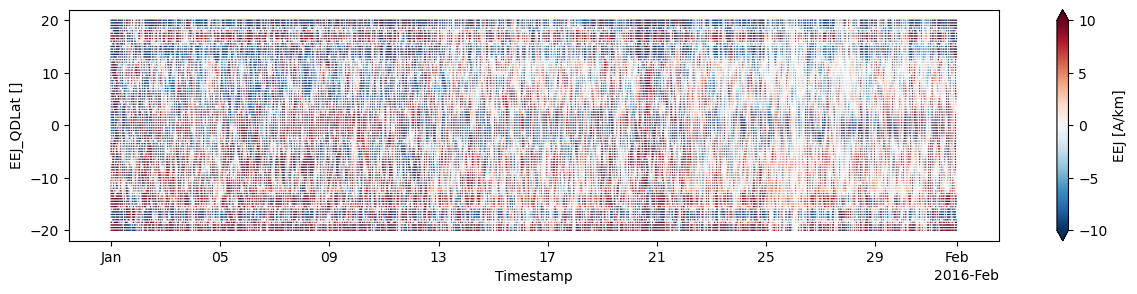

In [11]:
_ds = ds.sel({"Timestamp": "2016-01"})

fig, ax1 = plt.subplots(nrows=1, figsize=(15,3), sharex=True)
_ds.plot.scatter(x="Timestamp", y="EEJ_QDLat", hue="EEJ", vmax=10, s=1, linewidths=0, ax=ax1)